<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB3/blob/main/6351071043_LAB3_Bai5(Trang29).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5. Để kiểm tra xem khối u, tổn thương trong ngực bệnh nhân có phải là ung thư hay
không, người ta thực hiện phương pháp chọc hút tế bào bằng kim nhỏ (FNA). Tế bào
lấy được sau đó được phân tích dưới kính hiển vi. Bảng dữ liệu6 trong mục tài liệu
tham khảo được tính từ hình ảnh dưới kính hiển vi, các thuộc tính trong bảng mô tả
các đặc tính của tế bào được phân tích. Sinh viên hãy dùng thuật toán gom cụm để
gom nhóm các khối u lành tính (benign) hoặc ác tính (malignant)

1.  Tải dữ liệu và Thư viện


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

base_features = [
    "radius", "texture", "perimeter", "area", "smoothness",
    "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"
]
column_names = ["id", "diagnosis"]
for suffix in ["_mean", "_se", "_worst"]:
    for feature in base_features:
        column_names.append(feature + suffix)

df_raw = pd.read_csv('wdbc.data', header=None, names=column_names)


X = df_raw.drop(['id', 'diagnosis'], axis=1).values

y_map = {'M': 0, 'B': 1}
y = df_raw['diagnosis'].map(y_map).values

feature_names = df_raw.drop(['id', 'diagnosis'], axis=1).columns
target_names = np.array(['malignant', 'benign'])

print("\nNguyễn Thành Luân - 6351071043")
print("Kích thước dữ liệu (X):", X.shape)
print("Số lượng đặc trưng:", len(feature_names))
print("Nhãn (Target classes):", target_names)
print(f"- 0: {target_names[0]} (Ác tính - M)")
print(f"- 1: {target_names[1]} (Lành tính - B)")

df = pd.DataFrame(X, columns=feature_names)
print("\n5 mẫu dữ liệu đầu tiên:")
display(df.head())


Nguyễn Thành Luân - 6351071043
Kích thước dữ liệu (X): (569, 30)
Số lượng đặc trưng: 30
Nhãn (Target classes): ['malignant' 'benign']
- 0: malignant (Ác tính - M)
- 1: benign (Lành tính - B)

5 mẫu dữ liệu đầu tiên:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


2. Chuẩn hóa dữ liệu (Quan trọng)
Thuật toán k-Means dựa trên khoảng cách Euclide. Vì dữ liệu y tế có các đơn vị đo lường khác nhau (ví dụ: diện tích khối u và độ mịn bề mặt có thang đo rất khác nhau), việc chuẩn hóa (Standardization) là bắt buộc để thuật toán hoạt động chính xác.

In [4]:
print("\nNguyễn Thành Luân - 6351071043")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Đã chuẩn hóa dữ liệu (Mean=0, Std=1).")
print("Ví dụ mẫu đầu tiên sau khi chuẩn hóa:\n", X_scaled[0][:5], "...")


Nguyễn Thành Luân - 6351071043
Đã chuẩn hóa dữ liệu (Mean=0, Std=1).
Ví dụ mẫu đầu tiên sau khi chuẩn hóa:
 [ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633] ...


3. Gom cụm với k-MeansChúng ta biết trước có 2 loại khối u, nên sẽ đặt số cụm $k=2$.

In [5]:

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)

labels_pred = kmeans.labels_
print("\nNguyễn Thành Luân - 6351071043")


Nguyễn Thành Luân - 6351071043


4. Đối chiếu nhãn và Đánh giá
Lưu ý: k-Means gán nhãn 0 và 1 một cách ngẫu nhiên cho 2 cụm. Cụm "0" của k-Means có thể tương ứng với nhãn "1" (Lành tính) của dữ liệu gốc hoặc ngược lại. Chúng ta cần bước "khớp nhãn" (Label Matching) giống bài MNIST.

Phát hiện bị ngược nhãn. Đang đảo lại nhãn dự đoán...

Độ chính xác gom cụm (Accuracy): 0.9051


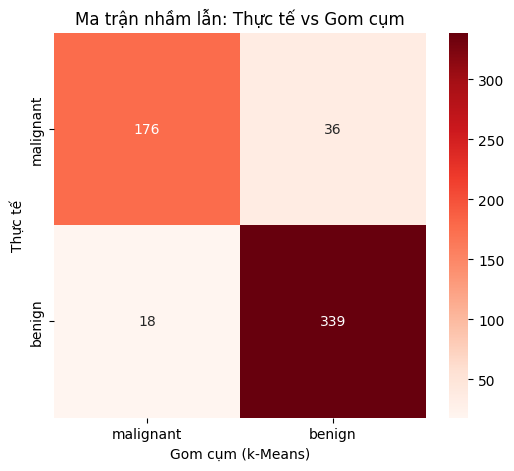


Nguyễn Thành Luân - 6351071043


In [6]:
def match_labels(y_true, y_pred):
    acc_original = accuracy_score(y_true, y_pred)

    y_pred_flipped = 1 - y_pred
    acc_flipped = accuracy_score(y_true, y_pred_flipped)

    if acc_flipped > acc_original:
        print("Phát hiện bị ngược nhãn. Đang đảo lại nhãn dự đoán...")
        return y_pred_flipped
    else:
        return y_pred

y_pred_final = match_labels(y, labels_pred)

acc = accuracy_score(y, y_pred_final)
cm = confusion_matrix(y, y_pred_final)

print(f"\nĐộ chính xác gom cụm (Accuracy): {acc:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Ma trận nhầm lẫn: Thực tế vs Gom cụm')
plt.ylabel('Thực tế')
plt.xlabel('Gom cụm (k-Means)')
plt.show()
print("\nNguyễn Thành Luân - 6351071043")

5. Trực quan hóa kết quả (PCA)
Dữ liệu có tới 30 đặc trưng (30 chiều), chúng ta không thể vẽ trực tiếp. Ta sẽ dùng PCA (Phân tích thành phần chính) để nén xuống còn 2 chiều để vẽ biểu đồ so sánh .


Nguyễn Thành Luân - 6351071043


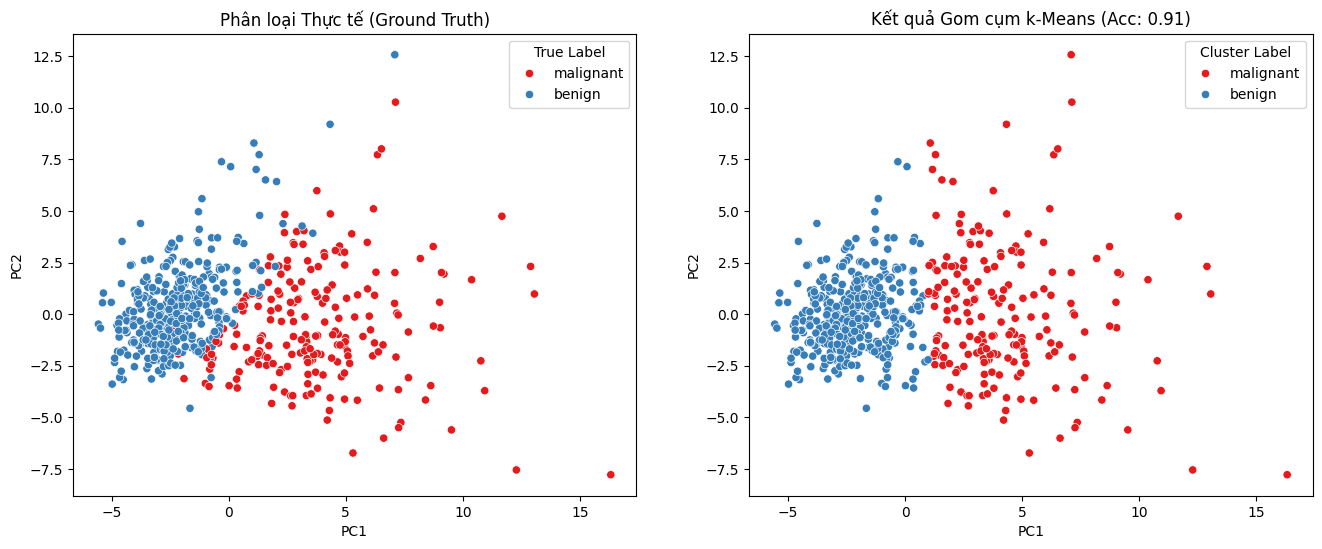

In [7]:
print("\nNguyễn Thành Luân - 6351071043")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['True Label'] = target_names[y]
df_pca['Cluster Label'] = target_names[y_pred_final]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x='PC1', y='PC2', hue='True Label', data=df_pca, palette='Set1', ax=axes[0])
axes[0].set_title('Phân loại Thực tế (Ground Truth)')

sns.scatterplot(x='PC1', y='PC2', hue='Cluster Label', data=df_pca, palette='Set1', ax=axes[1])
axes[1].set_title(f'Kết quả Gom cụm k-Means (Acc: {acc:.2f})')

plt.show()